# eda 목차
- 기본적인 공통 전처리 
- 학습 데이터 심층 분석
- 시간대별 매출, 판매량,판매단가 그래프 
- 2019년 6월과 2020년 6월(test data) 추이 비교 

In [33]:
import pandas as pd
import numpy as np
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

import matplotlib 
import warnings


try:
    if platform.system()=="Windows":
        font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/H2GTRM.ttf").get_name()
        rc("font",family=font_name)
    else:
        rc('font',family='AppleGothic')
except:
    pass

matplotlib.rcParams['axes.unicode_minus']=False


In [34]:
warnings.filterwarnings(action = 'ignore') 

In [35]:
# 그래프에서 한글 폰트 깨지는 문제에 대한 대처

try:
    if platform.system()=="Windows":
        font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/H2GTRM.ttf").get_name()
        rc("font",family=font_name)
    else:
        rc('font',family='AppleGothic')
except:
    pass

matplotlib.rcParams['axes.unicode_minus']=False


# 데이터 로드 

In [36]:
# 데이터 로드 
def load_dataset(): 
    sales = pd.read_excel("sales.xlsx",header =1)
#     view_rate = pd.read_excel(path+"view_rate.xlsx",header =1, index_col= 0)
    return sales

sales = load_dataset()
# view_rate = load_dataset()[1]

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,NaN,NaN,NaN
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,NaN,1.0,2.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,NaN,200.0,200.0
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,NaN,NaN,NaN
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,NaN,1.0,NaN


# 데이터 전처리 
- 무형 지우기, 결측된 노출분 채우기

In [30]:
# 무형 지우기
sales.drop(sales[sales["상품군"]=="무형"].index, inplace=True)

In [31]:
# 결측된 노출분 채우기
# for i,row in sales.iterrows():
#     val = row["노출(분)"]
#     if i == 0 :
#         continue
        
#     if  np.isnan(val):
#         if sales.loc[i,"방송일시"] == sales.loc[i-1,"방송일시"]:
#             sales.loc[i,"노출(분)"] = sales.loc[i-1,"노출(분)"]
#         else : 
#             continue
            
# sales.isnull().sum()

In [32]:
sales.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,NaN,NaN,NaN
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,NaN,1.0,2.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,NaN,200.0,200.0
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,NaN,NaN,NaN
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,NaN,1.0,NaN


# 오류 데이터 수정
- 취급액=50000 데이터의 경우 취급액 column -> 0으로 수정
- 해당 데이터들은 판매단가 > 취급액인 경우가 대다수였으며(3개 제외), 잘못된  
- 직접 이메일과 전화를 통해 데이터의 문제점 확인
- 대회 측에서 전혀 판매되지 않은 상품이며, 잘못된 데이터라고 공지했음.

In [16]:
sales = sales.replace({"취급액":50000},{"취급액":1})

# 확인
print(sum((sales["판매단가"] == 50000) & (sales['취급액'] != 0)))

0


# 방송일시의 month, day, hour, minute, weekday 추가

In [21]:
# date 칼럼도 추가하고 싶으면 넣기 
# sales['date'] = pd.DatetimeIndex(sales['방송일시']).date

# month, day, hour, minute, weekday 열 추가
sales['month'] = pd.DatetimeIndex(sales['방송일시']).month
sales['day'] = pd.DatetimeIndex(sales['방송일시']).day
sales['hour'] = pd.DatetimeIndex(sales['방송일시']).hour
sales['minute'] = pd.DatetimeIndex(sales['방송일시']).minute
sales['weekday'] = pd.DatetimeIndex(sales['방송일시']).weekday

In [22]:
# 판매량 column 추가 (그래프 분석 목적)
sales['판매량'] = sales['취급액']/sales['판매단가']

In [23]:
sales.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,Unnamed: 8,Unnamed: 9,Unnamed: 10,month,day,hour,minute,weekday,판매량
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,NaN,NaN,NaN,1,1,6,0,1,52.606516
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,NaN,1.0,2.0,1,1,6,0,1,109.548872
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,NaN,200.0,200.0,1,1,6,20,1,81.754386
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,NaN,NaN,NaN,1,1,6,20,1,174.310777
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,NaN,1.0,NaN,1,1,6,40,1,167.218045


# 노출분과 취급액의 상관관계

In [17]:
corr1 = np.corrcoef(sales['노출(분)'],sales['취급액']) 
corr1

# corr2 = np.corrcoef(sales['상품코드'],sales['판매량']) 
# corr2

# 노출분 하나로 feature를 뽑는 것은 의미 x 

array([[1.        , 0.02746147],
       [0.02746147, 1.        ]])

In [18]:
sales.groupby(['노출(분)']).mean()['취급액']

노출(분)
2.466667     1.073100e+07
2.816667     8.974000e+06
3.000000     5.160500e+06
3.166667     4.907000e+06
3.283333     5.784000e+06
                 ...     
27.083333    2.903400e+07
29.983333    1.038000e+07
30.000000    2.560064e+07
30.100000    9.878827e+06
40.000000    1.014050e+07
Name: 취급액, Length: 102, dtype: float64

In [19]:
# fig, ax = plt.subplots(figsize=(10,5))  # figsize - 도화지 사이즈 

# ax.bar(sales.groupby(['노출(분)']).mean()['취급액]', sales['취급액'], color='blue', label='mean')

# plt.xticks()

# plt.xlabel('hour')
# plt.ylabel('sales')
# plt.legend(loc='upper left')



# 판매단가 > 취급가액 데이터 분석

In [20]:
# outlier = sales[sales['판매단가'] > sales['취급액']] 
# outlier.count()   #1990개  

# out_percent = 1990/37372 # 해당 데이터 / 전체 데이터 
# out_percent # 0.05324842127796211 (약 5%)

# outlier[sales['상품명'].str.contains('무이자') | sales['상품명'].str.contains('일시불')] 
# # 1431개  

In [21]:
# a = sales['판매단가'] < sales['취급액'] 
# b = sales['취급액']== 50000

# not_five = sales[a & b]
# not_five

# # 0개 
# # 결론 : 판매단가 > 취급액 데이터는 모두 취급가액 : 50000원 

# # sales['취급액'].min()

In [22]:
# out_category = outlier.groupby(['상품군'])['방송일시'].count()
# out_category

In [20]:
# 시간대별 매출액(취급액)의 min, max, sum구해보기 

hour_sales_min = sales.groupby('hour')['취급액'].min()
hour_sales_max = sales.groupby('hour')['취급액'].max()
hour_sales_sum = sales.groupby('hour')['취급액'].sum()

hour_sales = pd.concat([hour_sales_min,hour_sales_max, hour_sales_mean], axis=1)

# 시간별 매출액(취급액) 그래프 - sum

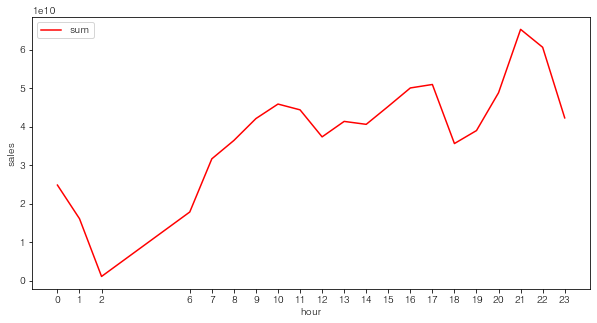

In [21]:
#시간별 매출액(취급액) 그래프 - sum 
hour_sales_sum = sales.groupby('hour')['취급액'].sum()

fig, ax = plt.subplots(figsize=(10,5))  # figsize - 도화지 사이즈 

ax.plot(hour_sales.index, hour_sales_sum, color='red', label='sum')

plt.xticks(hour_sales.index)

plt.xlabel('hour')
plt.ylabel('sales')
plt.legend(loc='upper left')



In [48]:
hour_salesfeat = hour_sales_sum / hour_sales_sum.max()

hour_salesfeat 
# hour_sales_sum.max()

hour
0     0.380012
1     0.246228
2     0.016302
6     0.272900
7     0.484548
8     0.557679
9     0.644847
10    0.702566
11    0.679582
12    0.571975
13    0.633542
14    0.621866
15    0.693516
16    0.766701
17    0.780516
18    0.545418
19    0.597047
20    0.747659
21    1.000000
22    0.928649
23    0.647592
Name: 취급액, dtype: float64

# 시간대별 판매량 그래프 

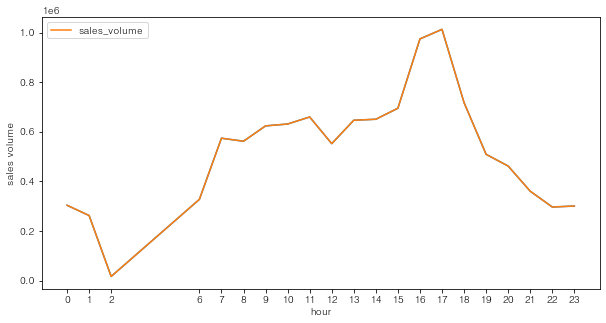

In [23]:
#시간대별 판매량(mean) 그래프 그리기 

# 시간대별 판매량 (sum) 
hour_count_sum = sales.groupby('hour')['판매량'].sum() 

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(hour_count_sum.index, hour_count_sum)
ax.plot(hour_count_sum.index, hour_count_sum, label='sales_volume')

plt.xticks(hour_count_sum.index)
           
plt.xlabel('hour')
plt.ylabel('sales volume')
plt.legend(loc='upper left')

# 시간대별 판매단가 그래프

No handles with labels found to put in legend.


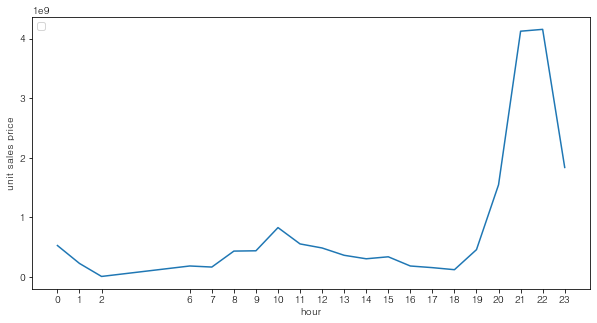

In [37]:
# 시간대별 판매 단가 그래프 

hour_price = sales.groupby(['hour'])['판매단가'].sum()

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(hour_price.index, hour_price)

plt.xticks(hour_price.index)
           
plt.xlabel('hour')
plt.ylabel('unit sales price')
plt.legend(loc='upper left')

# 시간대별로 어떤 상품군의 방송이 편성되었는지 확인

- 문제점 : count 기준으로는 잘못된 결과 도출 
- 노출분 기준으로 확인해야함.
- 다른 파일에서 노출분 기준으로 작업 수행 

In [40]:
item = sales.groupby(['hour'])['상품군'].value_counts()

In [41]:
item_df = pd.DataFrame(item)

In [33]:
item_df.head()

상품군
hour 상품군      
0    의류    345
     속옷    290
     잡화    256
     생활용품  230
     가구    114

In [42]:
category = sales['상품군'].unique()
category
# array(['의류', '속옷', '주방', '농수축', '이미용', '가전', '생활용품', '건강기능', '잡화', '가구',
#        '침구'], dtype=object)

item_df = item_df.rename(columns={'상품군' : '횟수'})
item_ct = item_df.reset_index()

def item_drawer():
    
    fig, ax = plt.subplots(figsize=(10,5))
    for i in range(len(category)):
        ax.plot(item_ct[item_ct['상품군']==category[i]]['hour'], np.array(item_ct[item_ct['상품군']==category[i]]['횟수']), label = category[i])
        
               
    plt.xlabel('hour')
    plt.ylabel('broadcast count')
    plt.xticks(item_ct['hour'])
    plt.legend(loc='upper left')
    plt.show()

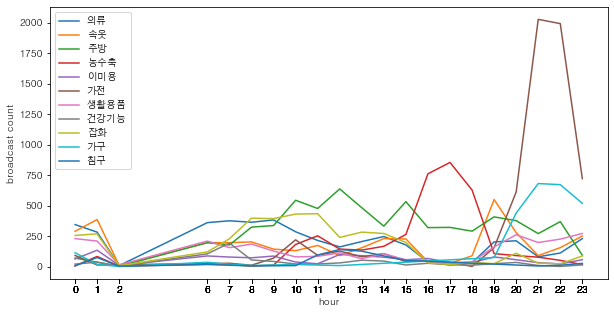

In [43]:
item_drawer()

In [36]:
category  #갈색 - 가전 --> 판매 단가가 밤 시간대에만 치솟았던 이유 확인 가능. 
          #빨간색 - 농수축(식품)  --> 시간대별 판매량 그래프와 동일한 추이를 보이고 있음 (prime time 주력 상품군으로 예상됨.)
          #초록색 - 주방 --> 꾸준히 높은 비중으로 방송되고 있음.
          # 회색 - 건강기능 

array(['의류', '속옷', '주방', '농수축', '이미용', '가전', '생활용품', '건강기능', '잡화', '가구',
       '침구'], dtype=object)

# 시간대별 상품군 판매량 추이 

In [44]:
# 상품군별 판매량 

item_sales = sales.groupby(['hour','상품군'])['판매량'].sum() 

item_df2 = pd.DataFrame(item_sales)
item_df2.head()

판매량
hour 상품군               
0    가구     1860.561076
     가전      946.489249
     건강기능   5838.523187
     농수축   11948.123968
     생활용품  25610.420482

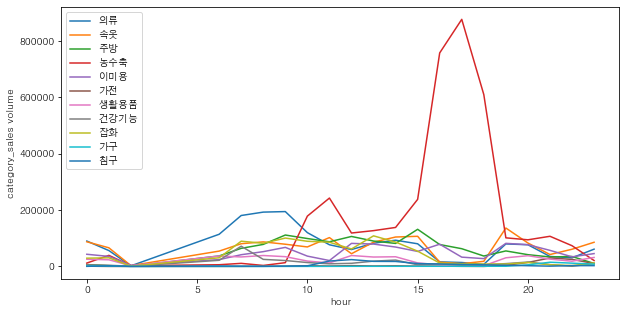

In [45]:
item_df2 = item_df2.rename(columns={'상품군' : '횟수'})
item_ct2 = item_df2.reset_index()

def item_drawer2():
    
    fig, ax = plt.subplots(figsize=(10,5))
    for i in range(len(category)):
        ax.plot(item_ct2[item_ct2['상품군']==category[i]]['hour'], np.array(item_ct2[item_ct2['상품군']==category[i]]['판매량']), label = category[i])
                     
    plt.xlabel('hour')
    plt.ylabel('category_sales volume')
    plt.legend(loc='upper left')
    plt.show() 

item_drawer2()


# test data 분석 (2020년 6월)
## 시간대별 상품군별 방송노출 시간 - 요일별 확인 

In [49]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt 

import warnings

warnings.filterwarnings(action = 'ignore') 


test_data = pd.read_excel('test_data.xlsx', header=1) 


# 무형 지우기
test_data.drop(test_data[test_data["상품군"]=="무형"].index, inplace=True)

# month, day, hour, minute, weekday 열 추가
test_data['weekday'] = pd.DatetimeIndex(test_data['방송일시']).weekday
test_data['hour'] = pd.DatetimeIndex(test_data['방송일시']).hour

test_data.head()


,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,weekday,hour
0,2020-06-01 06:20:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN,0,6
1,2020-06-01 06:40:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN,0,6
2,2020-06-01 07:00:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN,0,7
3,2020-06-01 07:20:00,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN,0,7
4,2020-06-01 07:40:00,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN,0,7


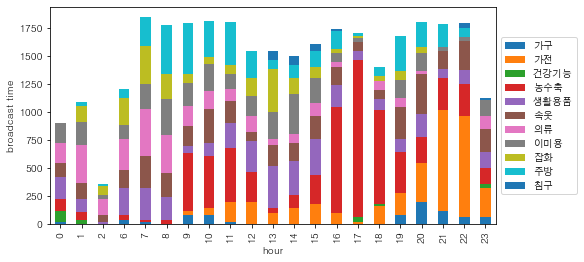

In [50]:
#2020년 6월 - 시간대별로 상품군이 몇분 노출되었는지

fig, ax = plt.subplots(figsize=(8,4))

test_data0 = test_data[test_data['weekday']==0]

test_data.groupby(['hour','상품군']).sum()['노출(분)'].unstack().plot(kind='bar',stacked=True, ax=ax)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.xlabel('hour')
plt.ylabel('broadcast time')

plt.show()

# 2019년 6월 추이랑 비교해보자. 

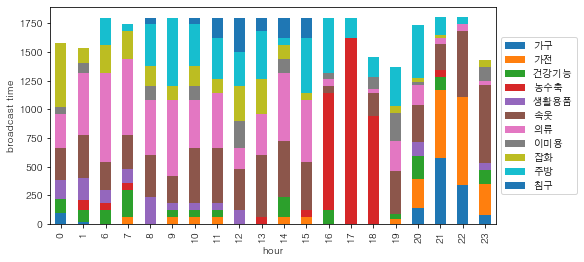

In [51]:
# 노출시간 채우지 않은 데이터 활용 -> 중복 문제 해결 
# 2019년 06월 - 시간대별로 상품군이 몇분 노출되었는지 

sales_month6 = sales[sales['month']==6]

fig, ax = plt.subplots(figsize=(8,4))
sales_month6.groupby(['hour','상품군']).sum()['노출(분)'].unstack().plot(kind='bar',stacked=True, ax=ax)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.xlabel('hour')
plt.ylabel('broadcast time')

plt.show()

# 2020년 평일과 주말 편성 확인  -> 차이점 확인

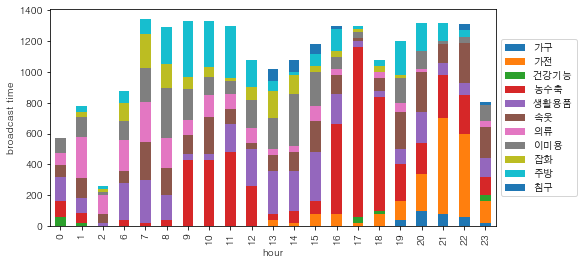

In [52]:
# 평일 확인
# 2020.06

wday = test_data[test_data['weekday'].isin([0,1,2,3,4])]

fig, ax = plt.subplots(figsize=(8,4))

wday.groupby(['hour','상품군']).sum()['노출(분)'].unstack().plot(kind='bar',stacked=True, ax=ax)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.xlabel('hour')
plt.ylabel('broadcast time')

plt.show()

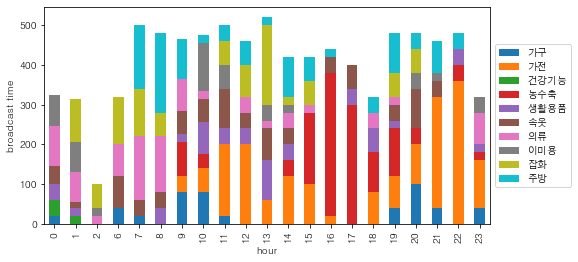

In [53]:
# 주말 확인 (토,일)

weekend = test_data[test_data['weekday'].isin([5,6])]

fig, ax = plt.subplots(figsize=(8,4))

weekend.groupby(['hour','상품군']).sum()['노출(분)'].unstack().plot(kind='bar',stacked=True, ax=ax)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.xlabel('hour')
plt.ylabel('broadcast time')

plt.show()

# 평일과 주말의 시간대별 노출분 확인해보기

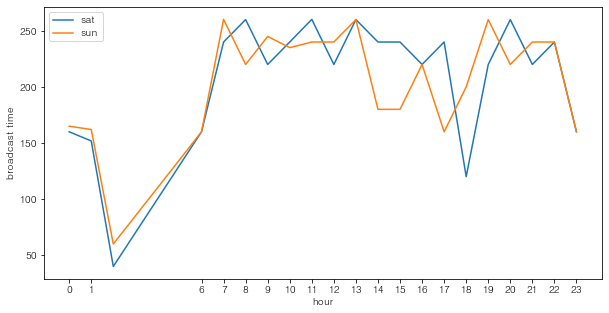

In [58]:
# 요일별로 filter 
# 0 : 월요일 ~ 6 : 일요일

test_data0 = test_data[test_data['weekday']==0]
test_data1 = test_data[test_data['weekday']==1]
test_data2 = test_data[test_data['weekday']==2]
test_data3 = test_data[test_data['weekday']==3]
test_data4 = test_data[test_data['weekday']==4]
test_data5 = test_data[test_data['weekday']==5]
test_data6 = test_data[test_data['weekday']==6]

# 평일 

hour_broad_sum0 = test_data0.groupby('hour')['노출(분)'].sum()
hour_broad_sum1 = test_data1.groupby('hour')['노출(분)'].sum()
hour_broad_sum2 = test_data2.groupby('hour')['노출(분)'].sum()
hour_broad_sum3 = test_data3.groupby('hour')['노출(분)'].sum()
hour_broad_sum4 = test_data4.groupby('hour')['노출(분)'].sum()

# 주말 매출액  groupby
hour_broad_sum5 = test_data5.groupby('hour')['노출(분)'].sum()
hour_broad_sum6 = test_data6.groupby('hour')['노출(분)'].sum()


fig, ax = plt.subplots(figsize=(10,5))  # figsize - 도화지 사이즈 

# ax.plot(hour_broad_sum0.index, hour_broad_sum0, label='mon')
# ax.plot(hour_broad_sum1.index, hour_broad_sum1, label='tue')
# ax.plot(hour_broad_sum2.index, hour_broad_sum2, label='wed')
# ax.plot(hour_broad_sum3.index, hour_broad_sum3, label='thu')
# ax.plot(hour_broad_sum4.index, hour_broad_sum4, label='fri')

# 주말 추이도 그려보자. (갈색 - 토요일 / 핑크 - 일요일)
ax.plot(hour_broad_sum5.index, hour_broad_sum5, label='sat') 
ax.plot(hour_broad_sum6.index, hour_broad_sum6, label='sun')

plt.xticks(hour_broad_sum0.index)

plt.xlabel('hour')
plt.ylabel('broadcast time')

plt.legend(loc='upper left')